SMOTE stands for Synthetic Minority Oversampling Technique and is an oversampling technique used to increase the samples in a minority class.

It generates new samples by looking at the feature space of the target and detecting nearest neighbors. Then, it simply selects similar samples and changes a column at a time randomly within the feature space of the neighboring samples.

- Package: [imbalanced-learn](https://imbalanced-learn.readthedocs.io/en/stable/)
- Install:
    - `pip install -U imbalanced-learn`
    - `conda install -c conda-forge imbalanced-learn`
    - dependencies: `conda -U install joblib`
- Data: `./data/creditcard_small.csv`
    
Use `SMOTENC` in imbalanced-learn to allow categorical values in your data.

Resample after train/test split so allow it only oversample the train data.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# plot graphs in retina resolution
%config InlineBackend.figure_format = 'retina'

Using TensorFlow backend.


In [2]:
# Import data and create X, y
df = pd.read_csv('./data/creditcard_small.csv')
# df = df.loc[df.Class==1, :].append(df.loc[df.Class==0, :].sample(5000))
X = df.iloc[:,:-1]
y = df.iloc[:,-1].map({1:'Fraud', 0:'No Fraud'})

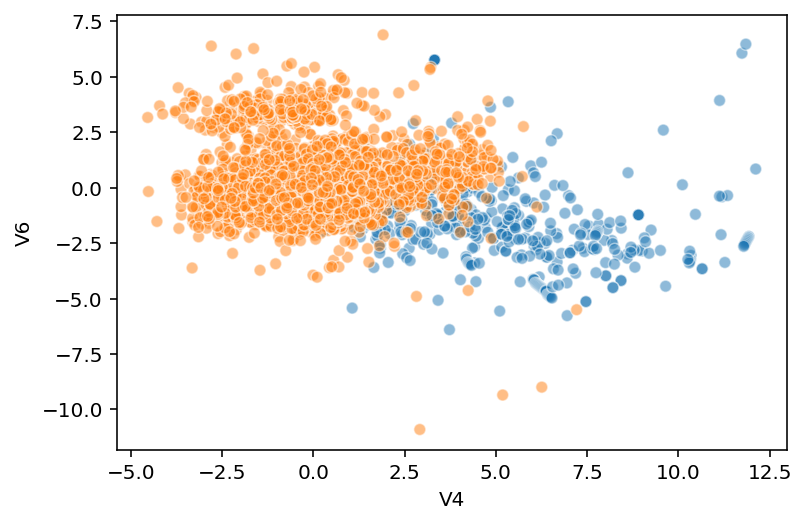

In [3]:
sns.scatterplot(X.V4, X.V6, y, alpha=.5, legend=False)
# plt.savefig("distribution.png", dpi=300)

In [4]:
from imblearn.over_sampling import SMOTE, ADASYN, SMOTENC

# docs: https://imbalanced-learn.readthedocs.io/en/stable/over_sampling.html#from-random-over-sampling-to-smote-and-adasyn
X_resampled, y_resampled = SMOTE(sampling_strategy='minority').fit_resample(X, y)
X_resampled, y_resampled = SMOTE(sampling_strategy={"Fraud":1000}).fit_resample(X, y)
X_resampled = pd.DataFrame(X_resampled, columns=X.columns)


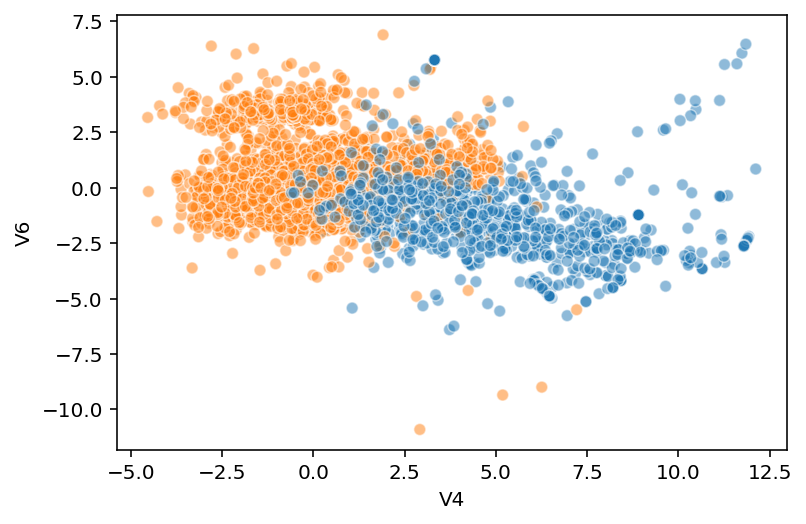

In [5]:
sns.scatterplot(X_resampled.V4, X_resampled.V6, y_resampled, alpha=.5, legend=False)
# plt.savefig("resampled.png", dpi=300)